In [122]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names", delimiter = "|")
res = data["Unnamed: 0"].dropna()
res
#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   #delimiter = ",", header = None,
                   #names = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names")

91                                          >50K, <=50K.
92                                      age: continuous.
93     workclass: Private, Self-emp-not-inc, Self-emp...
94                                   fnlwgt: continuous.
95     education: Bachelors, Some-college, 11th, HS-g...
96                            education-num: continuous.
97     marital-status: Married-civ-spouse, Divorced, ...
98     occupation: Tech-support, Craft-repair, Other-...
99     relationship: Wife, Own-child, Husband, Not-in...
100    race: White, Asian-Pac-Islander, Amer-Indian-E...
101                                   sex: Female, Male.
102                            capital-gain: continuous.
103                            capital-loss: continuous.
104                          hours-per-week: continuous.
105    native-country: United-States, Cambodia, Engla...
Name: Unnamed: 0, dtype: object

In [123]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   names = ("age", "workclass","fnlwgt","education","education-num",
                           "marital-status","occupation","relationship","race","sex",
                           "capital-gain","capital-loss","hours-per-week","native-country","res"),
                   header = None)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,res
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [124]:
pd.unique(data.sex)

array([' Male', ' Female'], dtype=object)

In [125]:
data.res = data.res.apply(lambda x: True if x == ' >50K' else False)

In [126]:
#1
print("Male = ",len(data[data.sex == " Male"]))
print("Female = ",len(data[data.sex == " Female"]))

Male =  21790
Female =  10771


In [127]:
#2
print(data[data.sex == " Male"].age.mean())

39.43354749885268


In [128]:
# 3
print(
    len(data[data["native-country"] == " United-States"]) / data["native-country"].size
)


0.895857006848684


<BarContainer object of 16 artists>

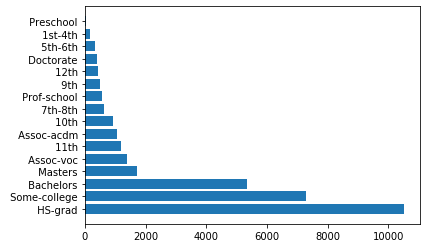

In [137]:
# 4
plt.barh(data.education.value_counts().index,
         data.education.value_counts().values)

In [130]:
# 5
# "final weights" is result ?
temp = data[data["marital-status"] == " Divorced"].res
print("mean = ",temp.mean())
print("std = ",temp.std())

mean =  0.10420886788206167
std =  0.3055656965459053


In [131]:
#6
# категории высшего образования(если что то не учел, это не моя вина)
cat = [' Bachelors',' Masters',' Doctorate']
print(len(data.query(f"education in {cat} and res == True")) / len(data.query("res == True")) > 0.5)

False


In [132]:
#7
data.groupby(["race","sex"]).age.max()

race                 sex    
 Amer-Indian-Eskimo   Female    80
                      Male      82
 Asian-Pac-Islander   Female    75
                      Male      90
 Black                Female    90
                      Male      90
 Other                Female    74
                      Male      77
 White                Female    90
                      Male      90
Name: age, dtype: int64

In [133]:
#8
print(pd.unique(data[data.occupation == ' Farming-fishing']["native-country"]))

[' United-States' ' Cambodia' ' Poland' ' Guatemala' ' Mexico' ' England'
 ' ?' ' Philippines' ' Italy' ' Puerto-Rico' ' Vietnam' ' Germany'
 ' Japan' ' Canada' ' Yugoslavia' ' Cuba' ' Portugal' ' El-Salvador'
 ' Hong' ' Ireland' ' France']


In [134]:
#9
cat = [' Unhusband',' Not-in-family']
temp = data.query(f"relationship in {cat} and education == ' Masters'")
print("Male = ",len(temp[temp.sex == ' Male']))
print("Female = ",len(temp[temp.sex == ' Female']))

Male =  238
Female =  279


In [135]:
#10
max_hours = data["hours-per-week"].max()
print("max hours-per-week = ",max_hours)
print("peoples who work max hours = ",len(data[data["hours-per-week"] == max_hours]))
print(data[data["hours-per-week"] == max_hours].res.apply(lambda x : ">50k" if x else "<=50k"))

max hours-per-week =  99
peoples who work max hours =  85
935       >50k
1172      >50k
1887      >50k
3578      >50k
4086     <=50k
4308     <=50k
4441      >50k
5376     <=50k
5432     <=50k
6618     <=50k
6898     <=50k
8072     <=50k
8393      >50k
8654     <=50k
8796      >50k
9811     <=50k
9831     <=50k
10143    <=50k
10266    <=50k
10468    <=50k
10986     >50k
11833    <=50k
12209    <=50k
12625    <=50k
12788    <=50k
13558     >50k
13580    <=50k
13617    <=50k
13858     >50k
14593    <=50k
         ...  
23226    <=50k
23398    <=50k
23649     >50k
23830    <=50k
24483     >50k
25354    <=50k
25713     >50k
25806    <=50k
25831     >50k
25986    <=50k
26250    <=50k
26596     >50k
26638    <=50k
26858    <=50k
27222    <=50k
27764    <=50k
27809    <=50k
28112    <=50k
29187     >50k
29751    <=50k
29989     >50k
30036     >50k
30610     >50k
30754    <=50k
30766     >50k
30992    <=50k
31681     >50k
31699    <=50k
32469    <=50k
32531    <=50k
Name: res, Length: 85, dtyp